# Explore here

In [87]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install xgboost
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-pac

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression, Lasso

In [89]:
df = pd.read_csv('/workspaces/regresion_lineal_regularizado/data/raw/demographic_health_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [90]:
df.shape

(3140, 108)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [92]:
# Comprobamos duplicados
df.duplicated().sum()

np.int64(0)

In [93]:
# Comprobamos valores nulos
df.isnull().sum().sum()

np.int64(0)

In [94]:
# Comprobamos si tenemos variables constantes
unicos = df.nunique()
var_const = unicos[unicos==1]
var_const

Series([], dtype: int64)

In [95]:
# Obtenemos las variables categorias
object_columns = df.select_dtypes(include=['object'])
print(object_columns.columns)

Index(['COUNTY_NAME', 'STATE_NAME'], dtype='object')


In [96]:
# Factorizamos las variables categoricas
df['COUNTY_NAME']=pd.factorize(df['COUNTY_NAME'])[0]
df['STATE_NAME']=pd.factorize(df['STATE_NAME'])[0]

In [97]:
# Revisamos si hay valores faltantes
df.isnull().sum().sum()

np.int64(0)

In [98]:
# Definimos nuestra variable objetivo ( Prevalencia de la diabetes)
target = 'diabetes_prevalence'

In [99]:
#Observaciones influyentes
# Identificar observaciones influyentes
X = df.drop(['diabetes_prevalence'], axis = 1)
y = df['diabetes_prevalence']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
cooks_distance = model.get_influence().cooks_distance

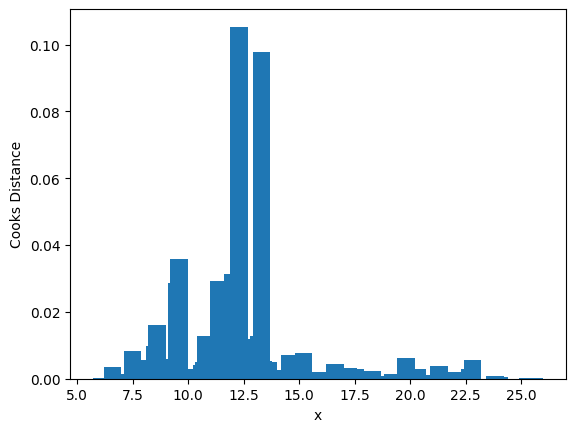

In [100]:
plt.bar(df['diabetes_prevalence'], cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [101]:
# Punto de corte para la distancia de cook
pto_corte = 4/len(df)

# Viviendas por encima del pto de corte
len(np.where(cooks_distance[0]>pto_corte)[0])

117

In [102]:
# Eliminamos las observaciones influyentes
df_noinflu = df.drop(np.where(cooks_distance[0]>pto_corte)[0])

In [103]:
# Partición de los datos

X = df_noinflu.drop(['diabetes_prevalence','diabetes_Lower 95% CI', 'diabetes_Upper 95% CI','diabetes_number'], axis =1)
y= df_noinflu['diabetes_prevalence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Selección de características, utilizamos XGBoost

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_importancia = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_importancia = df_importancia.sort_values(by='Importance', ascending=False)
df_importancia

,Feature,Importance
100,CKD_Lower 95% CI,74.541679
84,anycondition_Lower 95% CI,7.192683
99,CKD_prevalence,5.843502
96,COPD_Lower 95% CI,2.070900
65,Active Patient Care Primary Care Physicians pe...,1.379585
...,...,...
82,county_pop2018_18 and older,0.002334
57,Employed_2018,0.001228
32,POP_ESTIMATE_2018,0.000000
60,Median_Household_Income_2018,0.000000


In [105]:
# Seleccionamos las características que tienen una importancia > 1%
X_train_imp = X_train[df_importancia[df_importancia.Importance>1]['Feature'].values]
X_test_imp = X_test[df_importancia[df_importancia.Importance>1]['Feature'].values]

<Axes: >

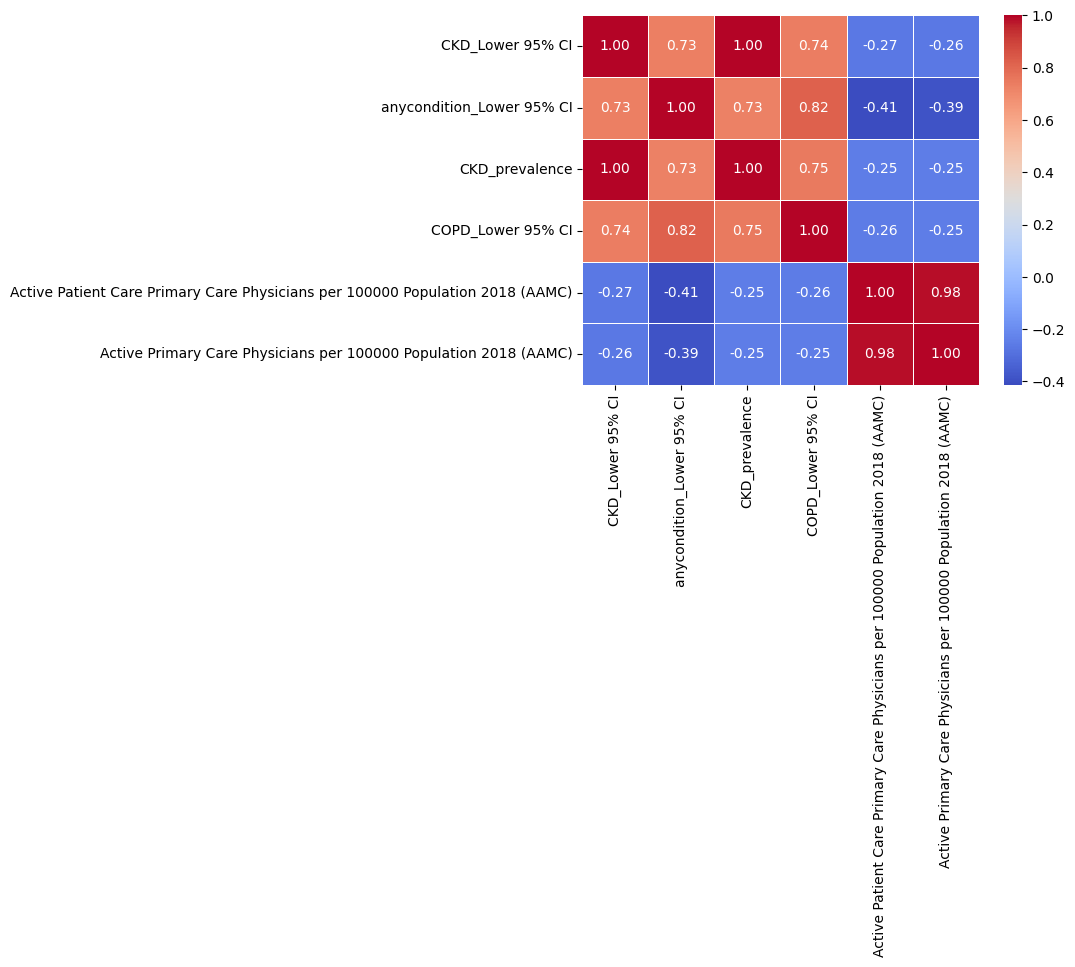

In [106]:
# VIF
X_corr = X_train_imp.copy()
X_corr['y'] = y_train
corr = X_train_imp.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [107]:
# Eliminamos las variables CKD_Lower 95% CI que presentan alta colinealidad entre ellas:
X_train_imp = X_train_imp.drop(columns=['CKD_Lower 95% CI', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)'], errors='ignore')
X_test_imp = X_test_imp.drop(columns=['CKD_Lower 95% CI', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)'], errors='ignore')

In [108]:
# Escalado de variables
# Identificar las variables binarias
binary_cols = X_train_imp[(X_train_imp == 0)|(X_train_imp == 1)].dropna(axis=1).columns
binary_cols

Index([], dtype='object')

In [109]:
# Instanciamos el escalador y lo ajustamos con los datos de entrenamiento
scaler = MinMaxScaler().fit(X_train_imp)


# Transformamos los datos con el escalador ajustado
X_train_escalado = scaler.transform(X_train_imp)
X_test_escalado = scaler.transform(X_test_imp)

# Convertimos X_train_escalado y X_test_escalado en DataFrames y restauramos los nombres de columna
X_train_escalado = pd.DataFrame(X_train_escalado, columns=X_train_imp.columns, index=X_train_imp.index)
X_test_escalado = pd.DataFrame(X_test_escalado, columns=X_test_imp.columns, index=X_test_imp.index)

X_train_escalado


,anycondition_Lower 95% CI,CKD_prevalence,COPD_Lower 95% CI,Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)
2141,0.628362,0.500000,0.446154,0.121061
2728,0.596577,0.363636,0.315385,0.087894
215,0.286064,0.431818,0.315385,0.429519
307,0.308068,0.250000,0.161538,0.538972
252,0.136919,0.204545,0.130769,0.459370
...,...,...,...,...
1699,0.569682,0.409091,0.338462,0.316750
1140,0.684597,0.386364,0.523077,0.242123
1176,0.657702,0.454545,0.469231,0.970149
1348,0.459658,0.386364,0.223077,0.577114


In [110]:
# Creamos el modelo de regresión líneal y lo ajustamos a los datos
X_train_escalado = sm.add_constant(X_train_escalado)
X_test_escalado= sm.add_constant(X_test_escalado)

model = sm.OLS(y_train, X_train_escalado)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     diabetes_prevalence   R-squared:                       0.932
Model:                             OLS   Adj. R-squared:                  0.932
Method:                  Least Squares   F-statistic:                     8219.
Date:                 Wed, 12 Feb 2025   Prob (F-statistic):               0.00
Time:                         21:39:13   Log-Likelihood:                -2578.8
No. Observations:                 2418   AIC:                             5168.
Df Residuals:                     2413   BIC:                             5197.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

- Al encontratse Adj. R2 en valores muy cercanos a R2, no indica que no existe sobreajuste evidente.
- Todas las variables tienen un Pvalor de 0, lo que nos indica que todas son significativas para nuestra predicción.

In [111]:
y_pred = results.predict(X_test_escalado)
y_pred

3134     9.866763
1801    11.850291
359     13.144015
232      9.680155
53      16.972533
          ...    
2558    12.533824
2759    14.284105
451      9.743397
2552    15.186287
2958    12.443410
Length: 605, dtype: float64

In [112]:
# Métricas de evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}") 
print(f"MSE: {mse}")   
print(f"R² Score: {r2}") 

MAE: 0.5934735603046911
MSE: 0.5669382438432962
R² Score: 0.9210687382418207


- El modelo explica el 92,10% de la variabilidad de la prevalencia de la diabetes.
- Al ser el MSE bajo (0.56) nos está diciendo que tiene una buena precisión.

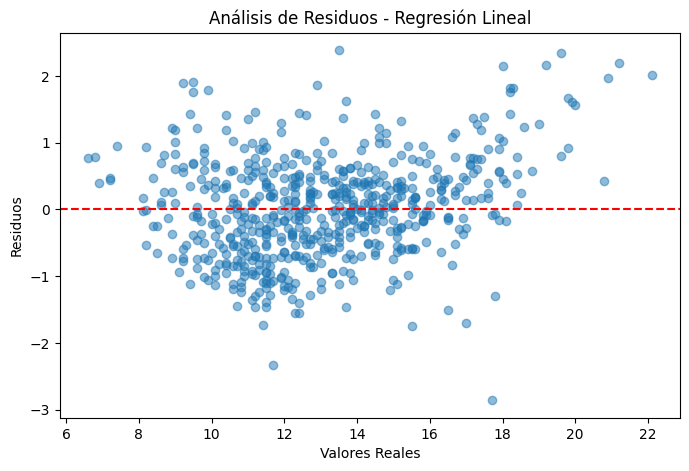

In [113]:
#Comprobamos que no hay sobreajustes
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Residuos")
plt.title("Análisis de Residuos - Regresión Lineal")
plt.show()

In [114]:
# modelo utilizando Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_escalado, y_train)
y_pred_lasso = lasso_model.predict(X_train_escalado)

# Métricas del modelo lasso
mae_lasso = mean_absolute_error(y_test, y_pred)
mse_lasso = mean_squared_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)

print(f"MAE: {mae_lasso}") 
print(f"MSE: {mse_lasso}")   
print(f"R² Score: {r2_lasso}") 

MAE: 0.5934735603046911
MSE: 0.5669382438432962
R² Score: 0.9210687382418207


In [115]:
# Comparación de resultados
print("\nComparación de Modelos:")
print(f"R² Regresión Lineal: {r2:.4f}")
print(f"R² Lasso Optimizado: {r2_lasso:.4f}")

if r2 ==r2_lasso:
    print('el modelo no ha mejorado')


Comparación de Modelos:
R² Regresión Lineal: 0.9211
R² Lasso Optimizado: 0.9211
el modelo no ha mejorado


/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.975e+02, tolerance: 1.747e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

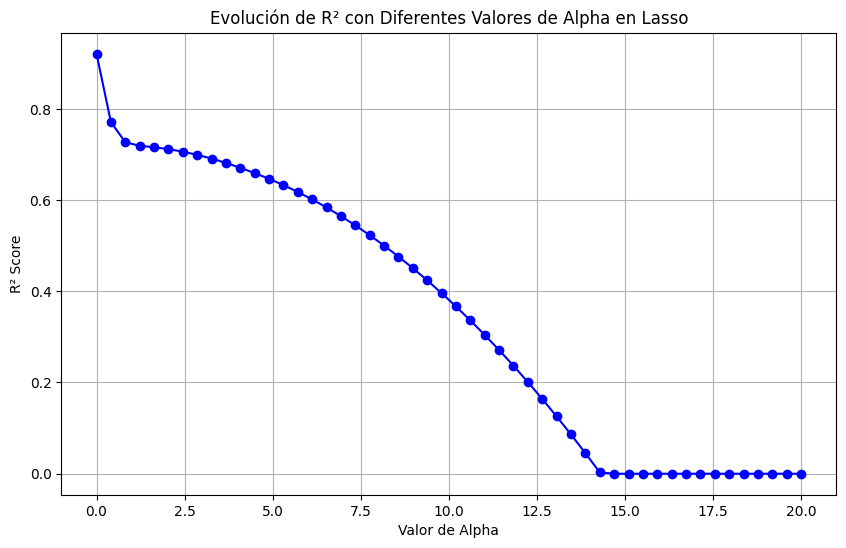

In [116]:
# Optimización del modelo lasso con hiperparámetros 

# Definimos el rango de valores para alpha 
alpha_values = np.linspace(0.0, 20, 50)  
r2_scores = []

# Entrenamos un modelo Lasso para cada valor de alpha y guardar el R²
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso_model.fit(X_train_imp, y_train)
    y_pred = lasso_model.predict(X_test_imp)
    r2_scores.append(r2_score(y_test, y_pred))

# Graficamos la evolución de R²
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, r2_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Valor de Alpha")
plt.ylabel("R² Score")
plt.title("Evolución de R² con Diferentes Valores de Alpha en Lasso")
plt.grid(True)
plt.show()

In [117]:
# Obtenemos el mejor alpha basado en el mayor R²
best_alpha_index = np.argmax(r2_scores)
best_alpha = alpha_values[best_alpha_index]
print(f"El mejor valor de alpha es: {best_alpha:.4f}")

El mejor valor de alpha es: 0.0000
